In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the data
path = "../datasets/SampleSuperstore.csv"
data = pd.read_csv(path)
print(data.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

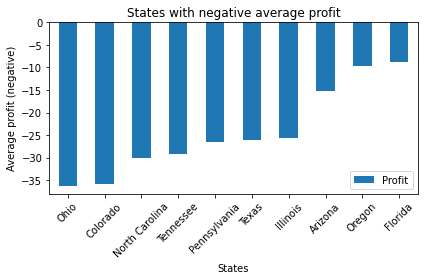

In [3]:
# Analyze data grouped by states
mean_profit_by_state = data.groupby(data['State'], as_index=False)["Profit"].mean()
states_in_loss = mean_profit_by_state.loc[mean_profit_by_state["Profit"] < 0].sort_values(by="Profit")
states_in_loss.plot.bar(x="State", y="Profit", rot=45, title="States with negative average profit")
plt.xlabel("States")
plt.ylabel("Average profit (negative)")
plt.tight_layout()
# plt.savefig(f'{output_dir}task3_states_profits.png')
plt.show()

### Inference - These 10 states should be given the most attention, as the business is facing losses here. Also, Ohio, Colorado and North Carolina have the most amount of losses (least profit).

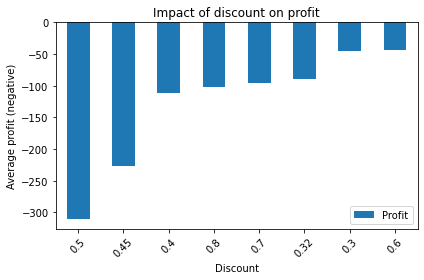

In [6]:
# Analyze data grouped by Discount
mean_profit_by_disc = data.groupby(data['Discount'], as_index=False)["Profit"].mean()
discounts_profit_relation = mean_profit_by_disc.loc[mean_profit_by_disc["Profit"] < 0].sort_values(by="Profit")
discounts_profit_relation.plot.bar(x="Discount", y="Profit", rot=45, title="Impact of discount on profit")
plt.xlabel("Discount")
plt.ylabel("Average profit (negative)")
plt.tight_layout()
# plt.savefig(f'{output_dir}task3_discount_profits.png')
plt.show()

### Inference - This leads us to a weird but true relationship between discount and profit. As seen from the above graph, whenever the profit is close to 0.5, the business suffers huge losses. Even at values less than that, or at values greater than 0.5, the average profit is better.

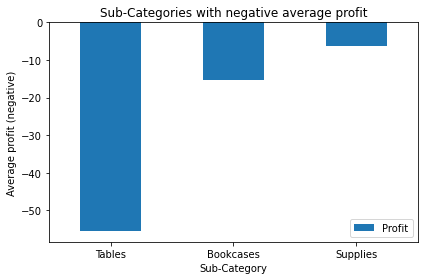

In [10]:
# Analyze data grouped by Sub-category
mean_profit_by_sub_cat = data.groupby(data['Sub-Category'], as_index=False)["Profit"].mean()
sub_categories_with_min_profit = mean_profit_by_sub_cat.loc[mean_profit_by_sub_cat["Profit"] < 0].sort_values(by="Profit")
sub_categories_with_min_profit.plot.bar(x="Sub-Category", y="Profit", rot=0,
                                            title="Sub-Categories with negative average profit")
plt.xlabel("Sub-Category")
plt.ylabel("Average profit (negative)")
plt.tight_layout()
# plt.savefig(f'{output_dir}task3_subcat_profits.png')
plt.show()

### Another interesting inference - Tables sub-category is facing the maximum average losses. Out of the 14 sub-categories, only 3 are facing losses. This could be taken into account to improve the business.